https://blog.csdn.net/qq_40784418/article/details/106023288

https://stackoverflow.com/questions/57283802/remove-small-whits-dots-from-binary-image-using-opencv-python

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
img = cv2.imread("input/001.png")

# Denoise
img = cv2.medianBlur(img, 3)

# Thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Dilate
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
bin_clo = cv2.dilate(binary, kernel, iterations=2)

- 參數：

`image`：也就是輸入圖像，必須是二值圖，即8位單通道圖像。 （因此輸入圖像必須先進行二值化處理才能被這個函數接受）

`connectivity`：可選值為4或8，也就是使用4連通還是8連通。

`ltype`：輸出圖像標記的類型，目前支援`CV_32S` 和 `CV_16U`。

- 返回值：

`num_labels`：所有連通域的數目

`labels`：圖像上每一像素的標記，用數字1、2、3…表示（不同的數字表示不同的連通域）

`stats`：每一個標記的統計信息，是一個5列的矩陣，每一行對應每個連通區域的外接矩形的`[x y width height 面積]`，範例如下： 

```python
[0 0 720 720 291805]
```

`centroids`：連通域的中心點 

In [15]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bin_clo, connectivity=8)
# num_labels, labels = cv2.connectedComponents(bin_clo, connectivity=8)

In [22]:
print(f'--> Number of labels = {num_labels}')
print(f'--> Stats = \n{stats}')
print(f'--> Centroids = \n', centroids)
print(f'--> Labels = \n{labels}')

--> Number of labels = 7
--> Stats = 
[[     0      0    976    635 254669]
 [   304      0      7      4     26]
 [   393      0      7      4     26]
 [    23      5    941    619 320766]
 [     8    247     10     10     88]
 [    32    304    174    177  24528]
 [   340    448    157    158  19657]]
--> Centroids = 
 [[474.63860148 330.78910272]
 [307.           1.38461538]
 [396.           1.38461538]
 [530.31373961 287.50691158]
 [ 12.5        251.5       ]
 [118.77523646 392.13237932]
 [418.0672534  527.00417154]]
--> Labels = 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
(img.shape)

(635, 976, 3)

In [25]:
# Paint random color to each label
output = np.zeros(img.shape, dtype=np.uint8)
for n_class in range(1, num_labels):
    mask = labels == n_class
    output[:, :, 0][mask] = np.random.randint(0, 255)
    output[:, :, 1][mask] = np.random.randint(0, 255)
    output[:, :, 2][mask] = np.random.randint(0, 255)

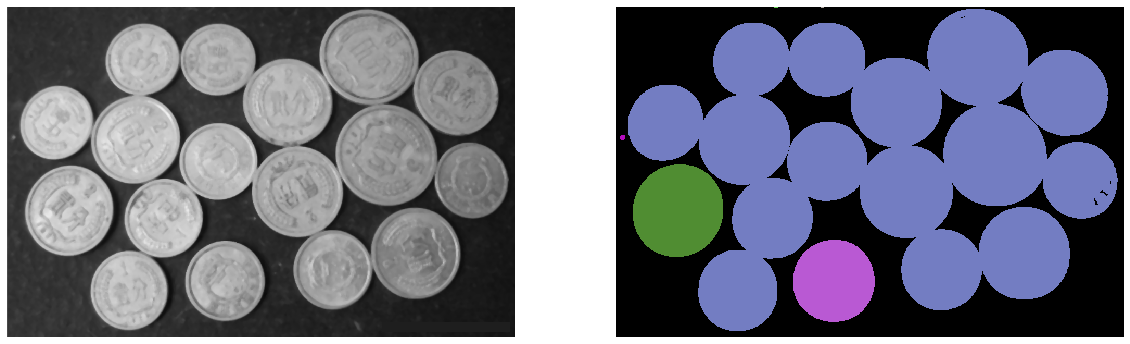

In [35]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(output)
plt.axis("off")
plt.show()